In [531]:
import operator
import random
import os,sys,shutil, glob, copy

import pandas
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
from sklearn.metrics import r2_score

import deap.tools
from deap import base
from deap import benchmarks
from deap import creator
from datetime import datetime, timedelta

In [615]:
model_ws = 'Base_0401_conc0118~0123/'
prefix = ['BH-1','BH-2','BH-3','MW-1','MW-2','MW-3','MW-4','MW-5','DJ-1','NDMW-09','NDMW-11','NDMW-12','NDMW-13']
prefix.sort()

In [616]:
command = '''#!/bin/bash
cd %s
# get prefix of model
prefix=$(cat batch.pfx)
echo $prefix

# remove output files.
rm "$prefix"o.*
rm scratch*
rm local*
rm *.dbg
rm array*
#rm parallel*
rm debug*
rm progress*
rm *.control'''%(model_ws)
os.system(command)

IC_ss


0

In [617]:
command = 'cd %s && grok.x > nul  && hgs.x > nul && hsplot.x > nul'%(model_ws)
os.system(command)

 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ 
 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ 
 @@                                                                      @@ 
 @@   GROK: Pre-processor for HydroGeoSphere                             @@
 @@                                                                      @@ 
 @@   REVISION:   2006                                                   @@
 @@   BUILD DATE: 20190329                                               @@
 @@   BUILD INFO: 64bit                                                  @@
 @@                                                                      @@ 
 @@   (c) Aquanty, Inc.                                                  @@
 @@       www.aquanty.com                                                @@ 
 @@       support@aquanty.com                                            @@
 @@                                                                      @@ 
 @@  

0

In [618]:
head = []
obs = pandas.read_csv(os.path.join(model_ws, '../C_Data.csv'))
welname = obs['Well'].values[:]
c_2110 = obs['PCE_2110'].values[:]
c_2204 = obs['PCE_2204'].values[:]
c_2208 = obs['PCE_2208'].values[:]
print(welname)
print(c_2110)
print(c_2204)
print(c_2208)

['NDMW-09' 'NDMW-11' 'NDMW-12' 'NDMW-13' 'NDMW-16' 'MW-1' 'MW-2' 'MW-3'
 'MW-4' 'MW-5' 'BH-1' 'BH-2' 'BH-3' 'DJ-1']
[ 0.02  4.65  2.9  18.     nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan]
[0.0000e+00 6.1860e+00 1.1680e+00 1.8698e+01 3.0000e-03 0.0000e+00
 1.6760e+00 2.0000e-03 6.2800e-01 0.0000e+00 1.0000e-03 1.0000e-03
 9.1500e-01 3.0000e-03]
[3.900e-02 4.872e+00 1.969e+00 1.476e+01       nan 1.200e-02 1.616e+00
 5.000e-03 8.670e-01 1.700e-02 2.400e-02 1.400e-02 1.108e+00 3.500e-02]


In [619]:
obs_dict = {}
for i in range(len(welname)):
    obs_dict[welname[i]] = [c_2110[i], c_2204[i], c_2208[i]]

print(obs_dict)

{'NDMW-09': [0.02, 0.0, 0.039], 'NDMW-11': [4.65, 6.186, 4.872], 'NDMW-12': [2.9, 1.168, 1.969], 'NDMW-13': [18.0, 18.698, 14.76], 'NDMW-16': [nan, 0.003, nan], 'MW-1': [nan, 0.0, 0.012], 'MW-2': [nan, 1.676, 1.616], 'MW-3': [nan, 0.002, 0.005], 'MW-4': [nan, 0.628, 0.867], 'MW-5': [nan, 0.0, 0.017], 'BH-1': [nan, 0.001, 0.024], 'BH-2': [nan, 0.001, 0.014], 'BH-3': [nan, 0.915, 1.108], 'DJ-1': [nan, 0.003, 0.035]}


In [633]:
time =[]
conc =[]
point_dict = {}
weln = ['BH-2-8','BH-2-13','BH-2-18','BH-2-23','BH-3-8','BH-3-13','BH-3-18','BH-3-23','MW-2-4','MW-2-9','MW-2-14','MW-2-19','NDMW-12-8','NDMW-12-13','NDMW-12-18','NDMW-12-23','NDMW-13-8','NDMW-13-13','NDMW-13-18','NDMW-13-23','NDMW-11-23','NDMW-11-18','NDMW-11-13','NDMW-11-8']
for i in range(len(weln)):
    fname = os.path.join(model_ws, '*conc.%s.PCE.dat' % (weln[i]))
    fname = glob.glob(fname)[0]
    point = np.loadtxt(fname, skiprows=3)
    time = point[:, 0]

    # 초(sec) 데이터를 날짜와 시간으로 변환
    start_time = datetime(2018, 1, 1, 0, 0, 0)
    date_data = []
    for sec in time:
        delta = timedelta(seconds=sec)
        date_data.append(start_time + delta)

    # point_dict에 time, head, date 정보 저장
    conc = point[:, 1] * 1000.0  # conc 값을 1000으로 나누어 MG/L 단위로 변환
    point_dict[weln[i]] = {'time': time, 'conc': conc, 'date': date_data}

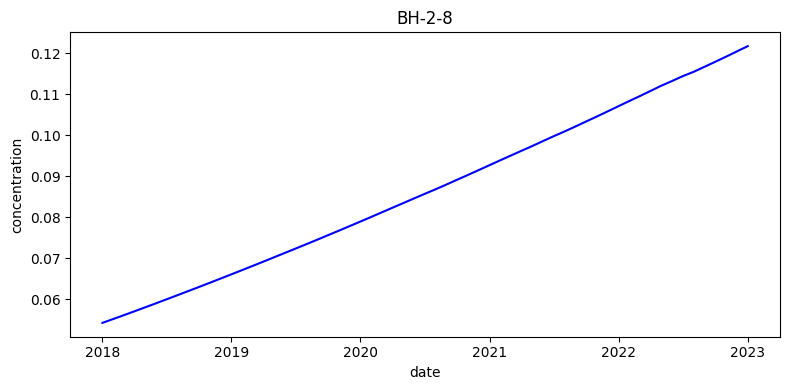

<Figure size 640x480 with 0 Axes>

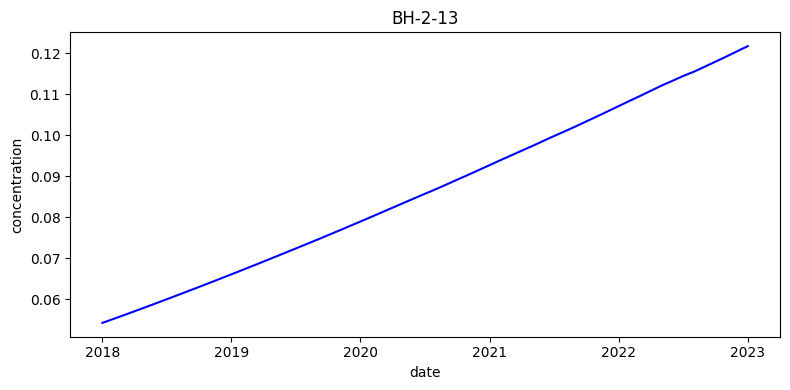

<Figure size 640x480 with 0 Axes>

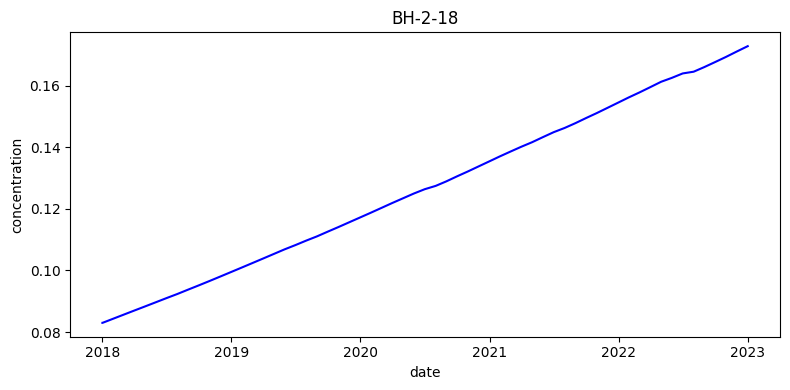

<Figure size 640x480 with 0 Axes>

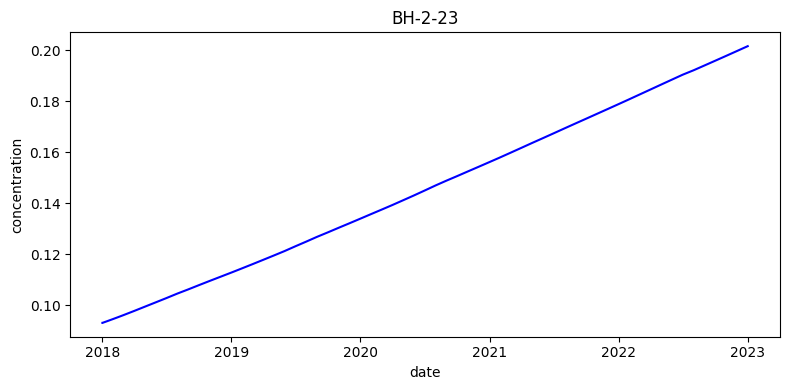

<Figure size 640x480 with 0 Axes>

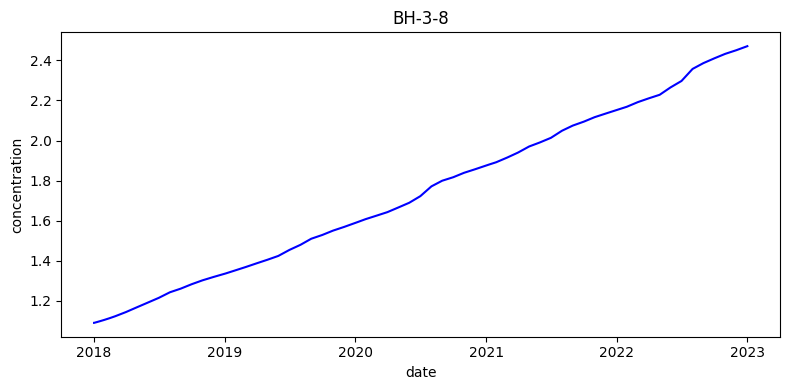

<Figure size 640x480 with 0 Axes>

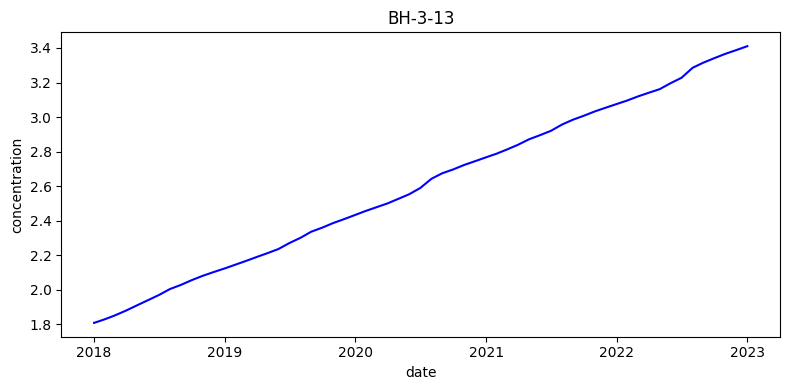

<Figure size 640x480 with 0 Axes>

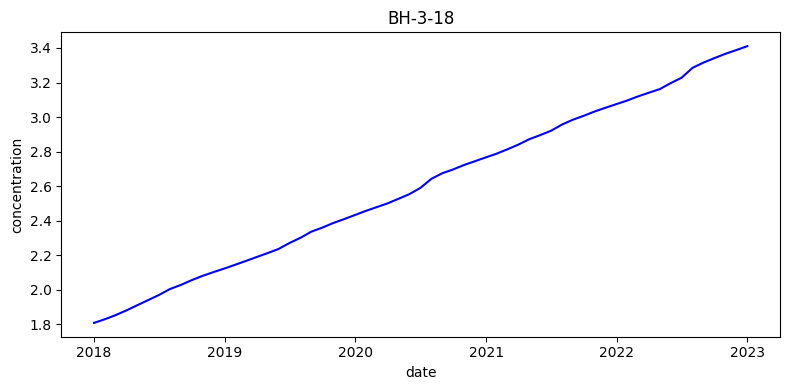

<Figure size 640x480 with 0 Axes>

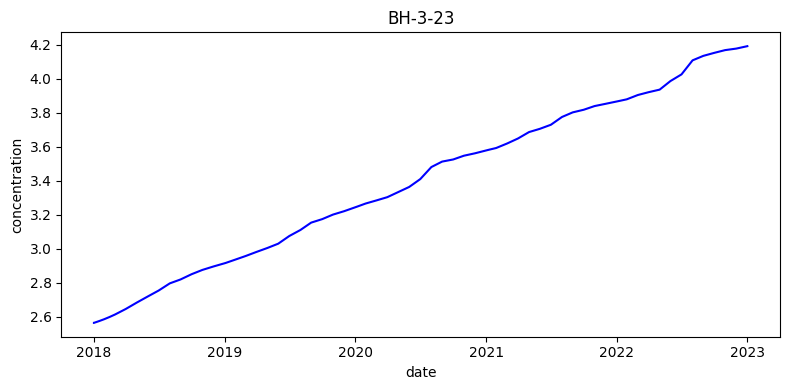

<Figure size 640x480 with 0 Axes>

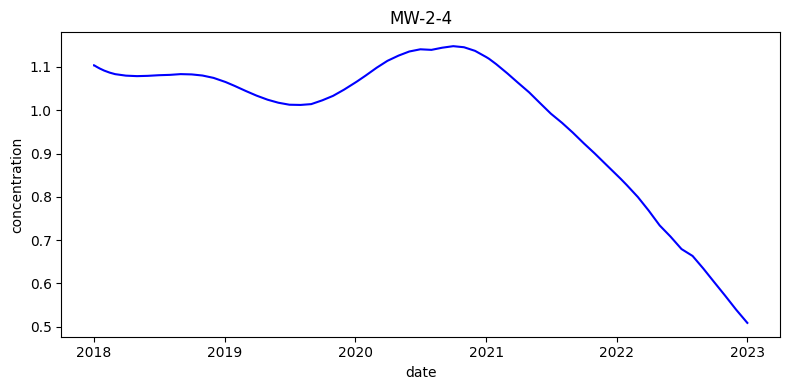

<Figure size 640x480 with 0 Axes>

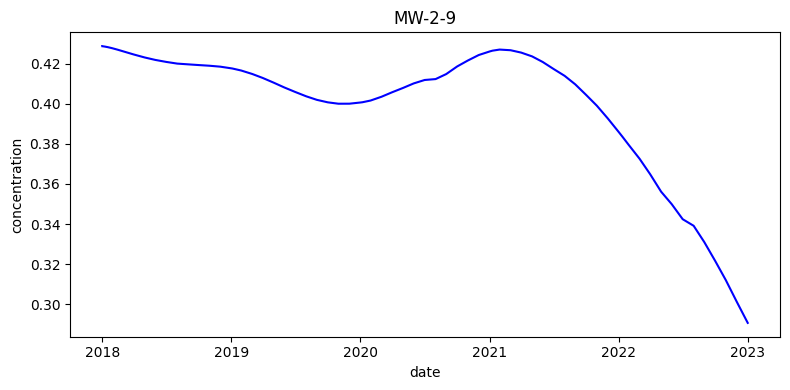

<Figure size 640x480 with 0 Axes>

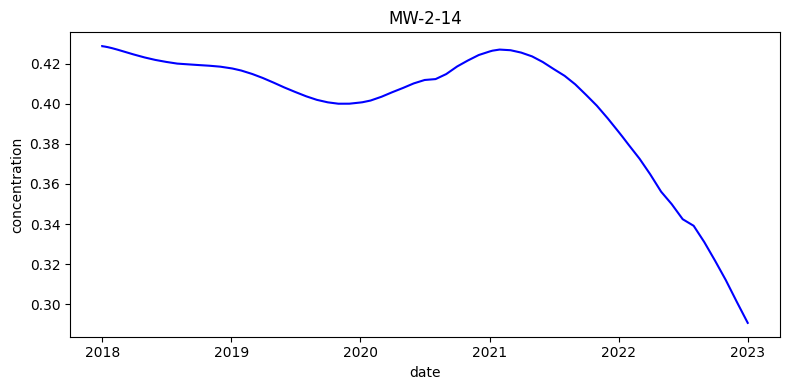

<Figure size 640x480 with 0 Axes>

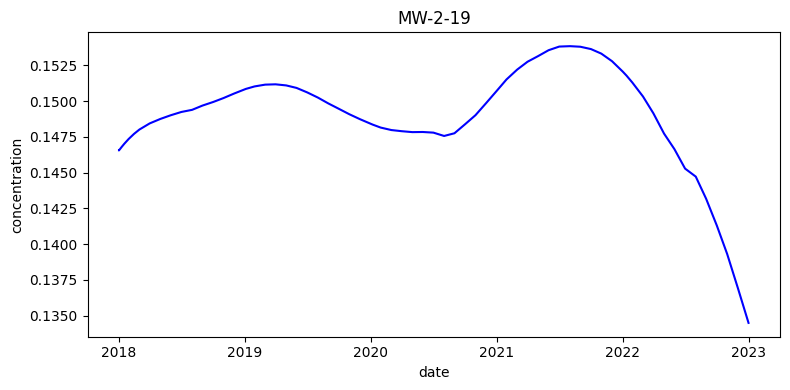

<Figure size 640x480 with 0 Axes>

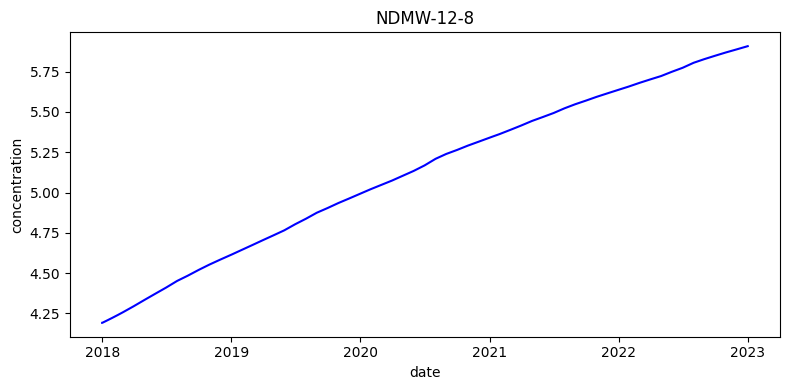

<Figure size 640x480 with 0 Axes>

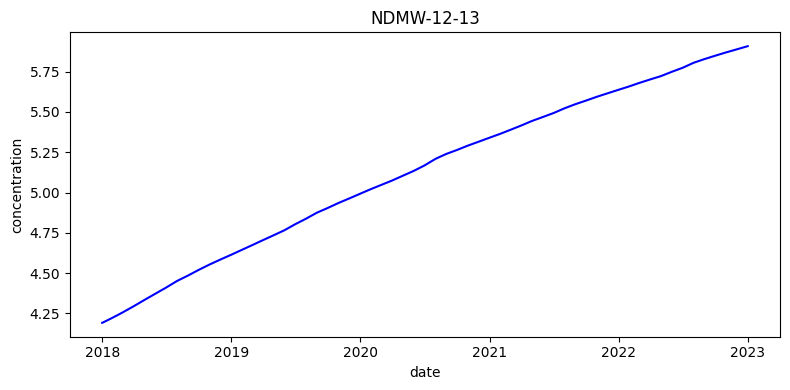

<Figure size 640x480 with 0 Axes>

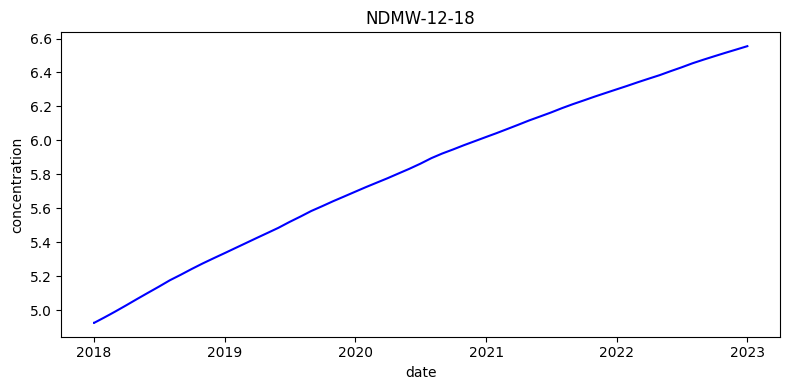

<Figure size 640x480 with 0 Axes>

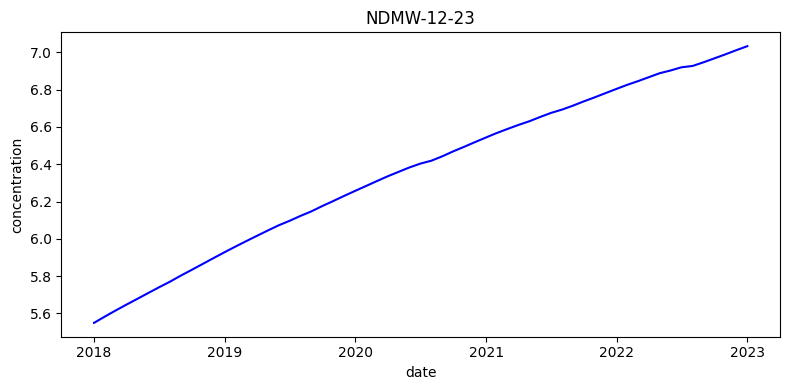

<Figure size 640x480 with 0 Axes>

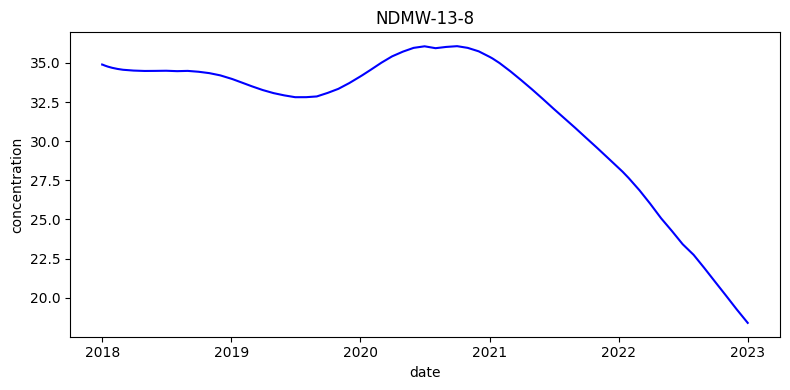

<Figure size 640x480 with 0 Axes>

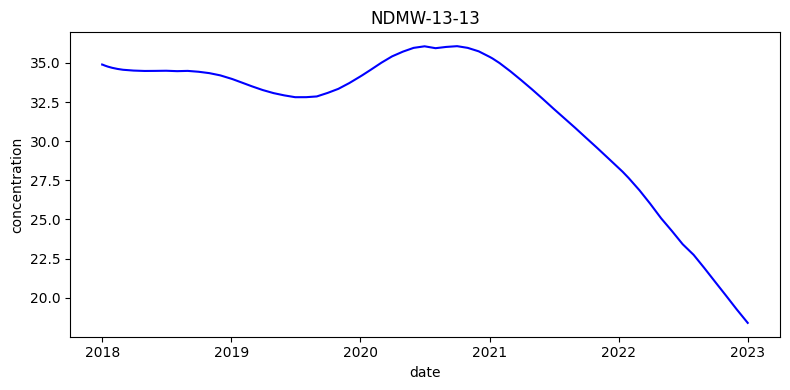

<Figure size 640x480 with 0 Axes>

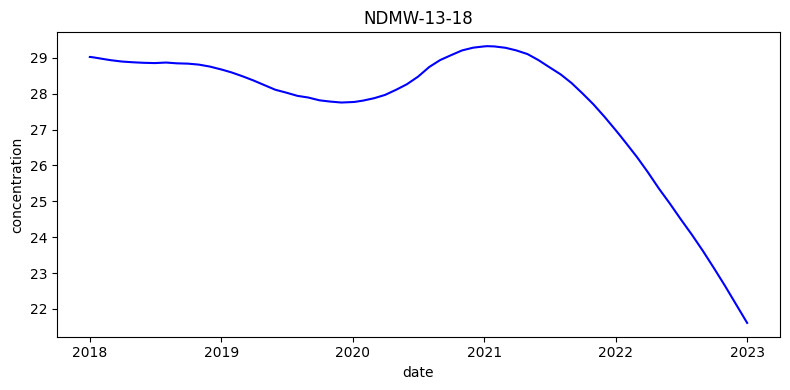

<Figure size 640x480 with 0 Axes>

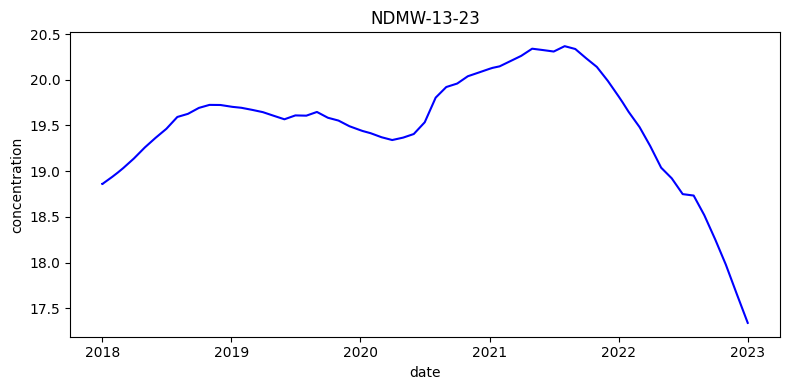

<Figure size 640x480 with 0 Axes>

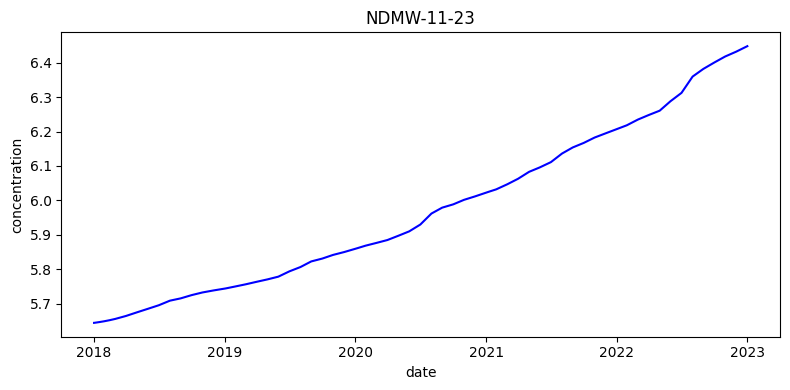

<Figure size 640x480 with 0 Axes>

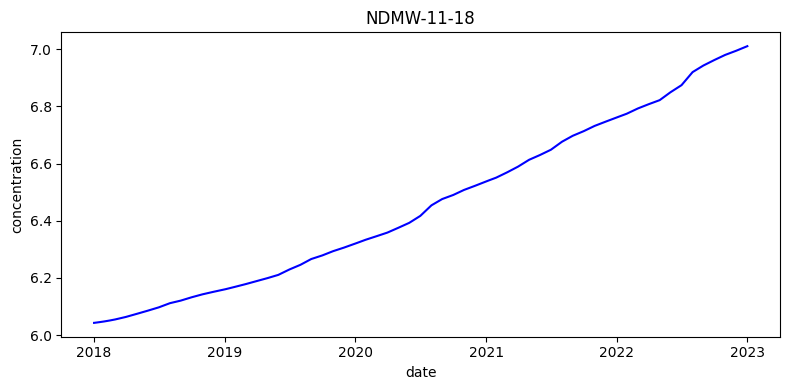

<Figure size 640x480 with 0 Axes>

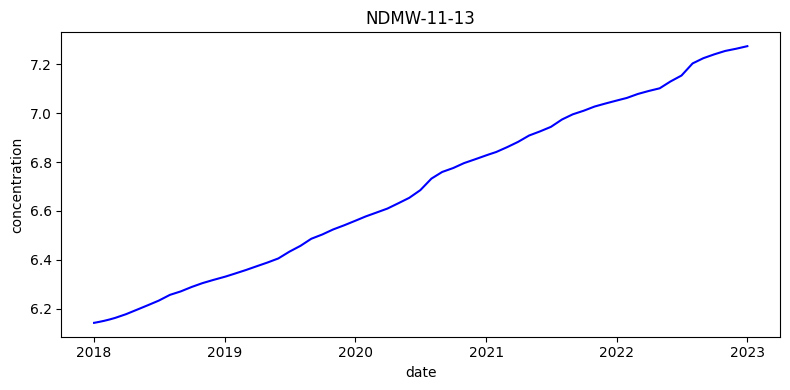

<Figure size 640x480 with 0 Axes>

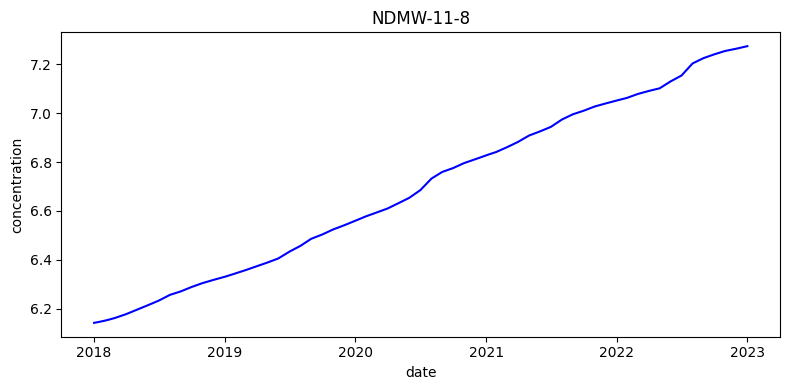

<Figure size 640x480 with 0 Axes>

In [636]:
# import matplotlib.pyplot as plt

prefix = ['BH-1','BH-2','BH-3','MW-1','MW-2','MW-3','MW-4','MW-5','DJ-1','NDMW-09','NDMW-11','NDMW-12','NDMW-13']

# 그래프 그리기
for i, well in enumerate(weln):
    # 그래프 그리기
    fig, axs = plt.subplots(figsize=(8, 4))

    # 모델 결과 데이터
    date = point_dict[well]['date']
    conc = point_dict[well]['conc']
    axs.plot(date, conc, c="blue")

    # 그래프 설정
    axs.set_title(well)
    axs.set_xlabel('date')
    axs.set_ylabel('concentration')

    plt.tight_layout()
    plt.show()
    plt.savefig(os.path.join(model_ws, 'tran_plot%s.png'%well))


In [622]:
time =[]
conc =[]
point_dict = {}
weln = ['BH-2-8','BH-2-13','BH-2-18','BH-2-23','BH-3-8','BH-3-13','BH-3-18','BH-3-23','MW-2-4','MW-2-9','MW-2-14','MW-2-19','NDMW-12-8','NDMW-12-13','NDMW-12-18','NDMW-12-23','NDMW-13-8','NDMW-13-13','NDMW-13-18','NDMW-13-23']
for i in range(len(prefix)):
    fname = os.path.join(model_ws, '*conc.%s.PCE.dat' % (prefix[i]))
    fname = glob.glob(fname)[0]
    point = np.loadtxt(fname, skiprows=3)
    time = point[:, 0]

    # 초(sec) 데이터를 날짜와 시간으로 변환
    start_time = datetime(1997, 4, 1, 0, 0, 0)
    date_data = []
    for sec in time:
        delta = timedelta(seconds=sec)
        date_data.append(start_time + delta)

    # point_dict에 time, head, date 정보 저장
    conc = point[:, 1] * 1000.0  # conc 값을 1000으로 나누어 MG/L 단위로 변환
    point_dict[prefix[i]] = {'time': time, 'conc': conc, 'date': date_data}

IndexError: list index out of range

KeyError: 'BH-1'

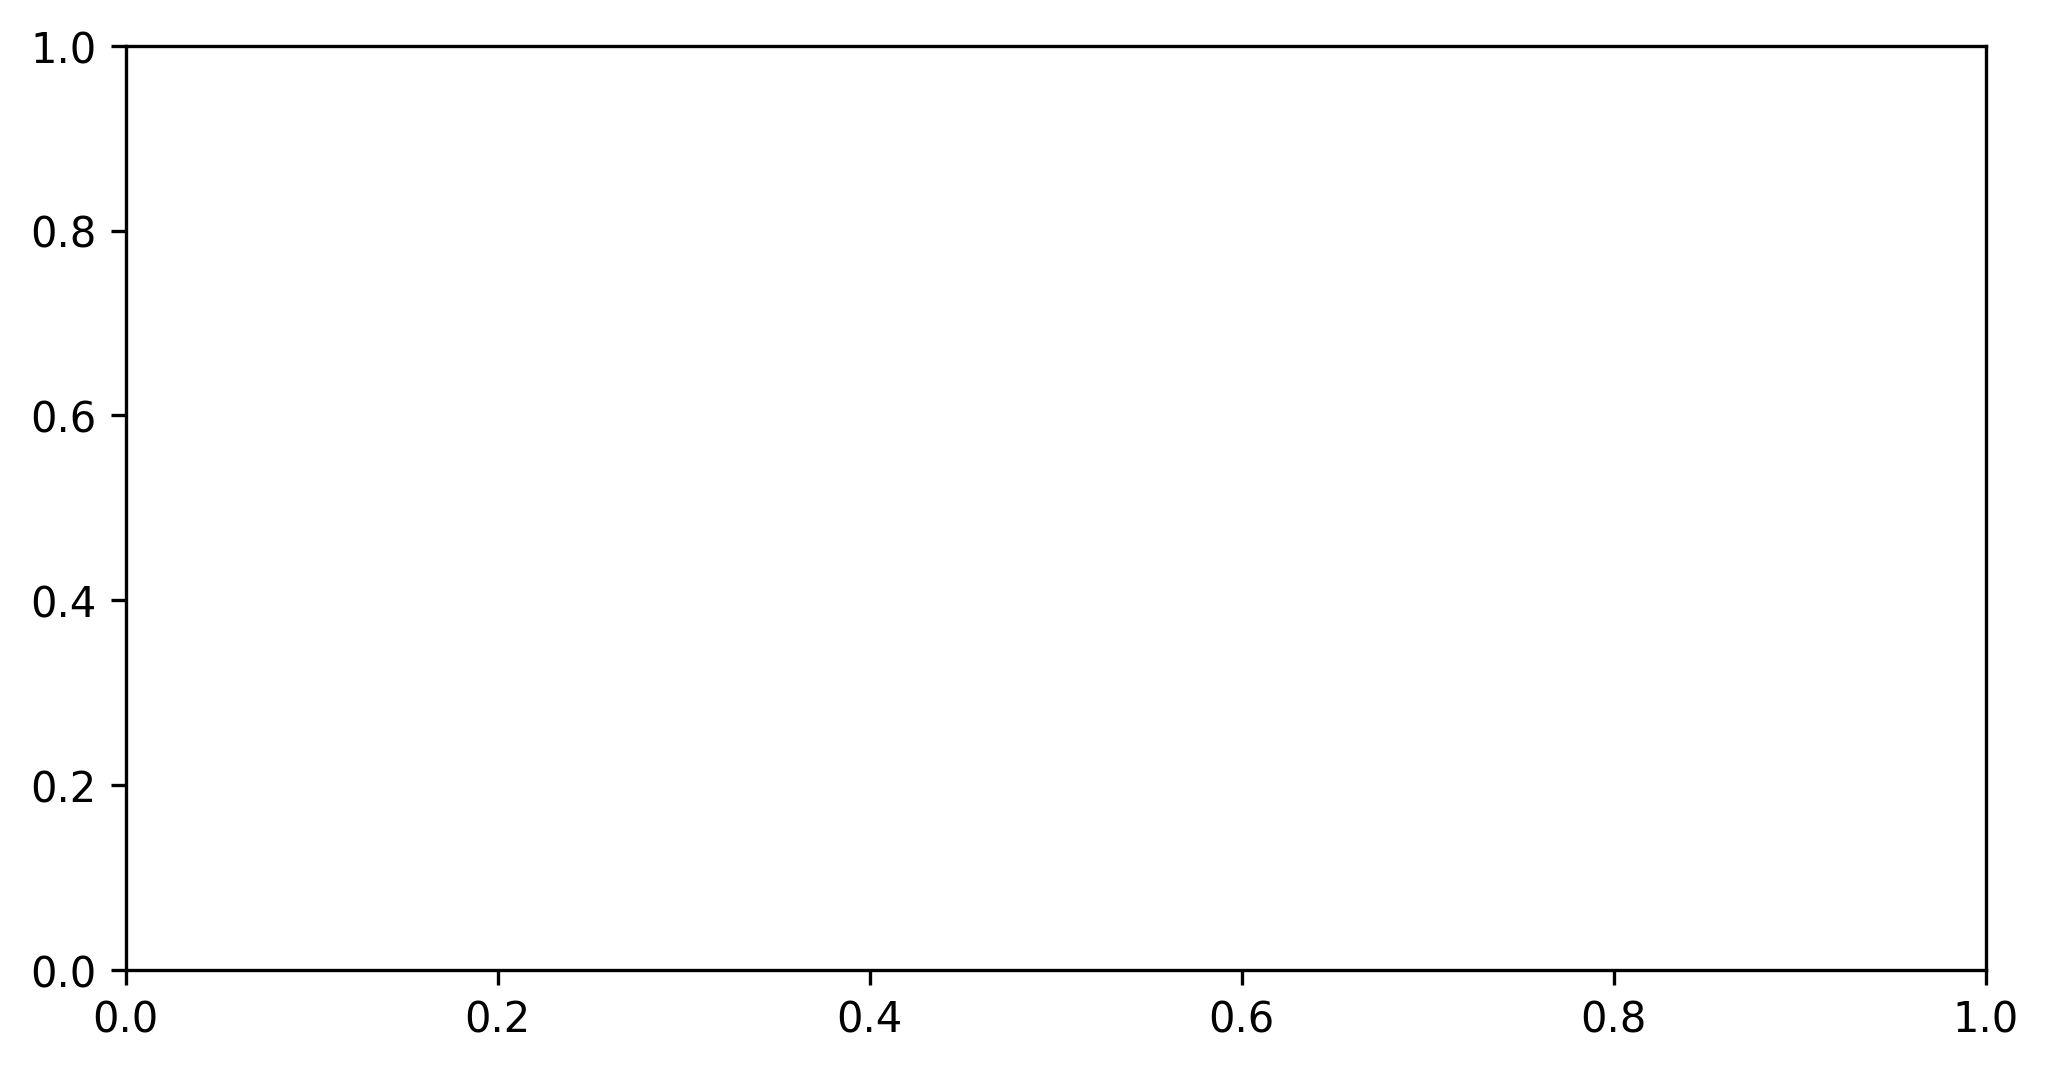

In [624]:
# 그래프 그리기
for i, well in enumerate(prefix):
    # 그래프 그리기
    fig, axs = plt.subplots(figsize=(8, 4), dpi = 300)

    # 모델 결과 데이터
    date = point_dict[well]['date']
    conc = point_dict[well]['conc']
    axs.plot(date, conc, c="blue")

    # 관측치 데이터
    obs_ = obs_dict[well][0]
    obs_august_22 = obs_dict[well][1]
    obs_january_23 = obs_dict[well][2]
    obs_dates = ['2022-04-04', '2022-08-17', '2023-01-17']
    obs_values = [obs_, obs_august_22, obs_january_23]
    for obs_date, obs_value in zip(obs_dates, obs_values):
        if not np.isnan(obs_value):
            obs_date = datetime.strptime(obs_date, '%Y-%m-%d')
            # axs.scatter(obs_date, obs_value, marker='o', c="black")

    # 그래프 설정
    axs.set_title(well)
    axs.set_xlabel('date')
    axs.set_ylabel('concentration(mg/L)')

    plt.tight_layout()
    plt.show()
    plt.savefig(os.path.join(model_ws, 'tran_plot%s.png'%well), dpi = 300)


In [ ]:
# 시드 값을 설정합니다.
np.random.seed(8900)

# 1.0e-8에서 1.0e-6 범위에서 난수 26개를 생성합니다.
rand_nums = np.random.uniform(1.0e-8, 1.0e-6, 26)
print(rand_nums)
print(np.average(rand_nums))
ran_ns = np.array(rand_nums)
print(ran_ns)